# Setup

In [1]:
# Comment out cells: %%script false --no-raise-error

%matplotlib inline
#%matplotlib widget
import sys
import os
from ast import literal_eval
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt

load_dotenv()
sys.path.append(os.getenv('CODE_ROOT_PATH')) # Add path

rcParams['figure.figsize'] = 15,10

TINY_LOG = os.path.join(os.getenv('TRAINED_MODELS'), 'tiny', 'log.txt')
TINY_LONGER_LOG = os.path.join(os.getenv('TRAINED_MODELS'), 'tiny_longer', 'log.txt')
SMALL_LOG = os.path.join(os.getenv('TRAINED_MODELS'), 'small', 'log.txt')
SMALL_PRETRAINED_LOG = os.path.join(os.getenv('TRAINED_MODELS'), 'small_pretrained', 'log.txt')
SUMMARY_LOG_PATH = os.path.join(os.getenv('TRAINED_MODELS'), 'losses.csv')

# Plot DINO Losses

In [2]:
# Open the respective log files and write its contents into dicts (one for each epoch)
models = [TINY_LOG, TINY_LONGER_LOG, SMALL_LOG, SMALL_PRETRAINED_LOG]
epochs = [None] * len(models)
epochs_dicts = [None] * len(models)
for model_index, log in enumerate(models):
    with open(log) as f:
         epochs[model_index] = f.readlines()
    epochs_dicts[model_index] = [literal_eval(epochs[model_index][epoch]) for epoch in range(len(epochs[model_index]))]

# DataFrame containing losses of all model types
loss = pd.DataFrame(np.nan, index=list(range(150)), columns=['Tiny', 'Tiny_Longer', 'Small','Small_Pretrained'])
loss.index.name = 'Epoch'
for model_index, col in enumerate(loss):
    for epoch in range(len(epochs_dicts[model_index])):
        loss[col][epoch] = epochs_dicts[model_index][epoch]['train_loss']

# Store losses in csv-file
loss.to_csv(SUMMARY_LOG_PATH)

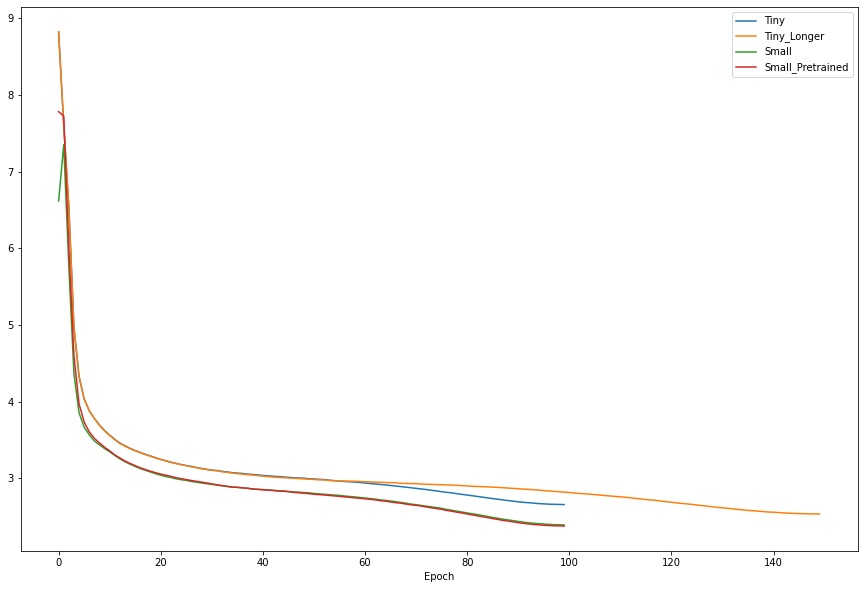

In [3]:
plot = loss.plot()